# Introduction to Matplotlib

In [102]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


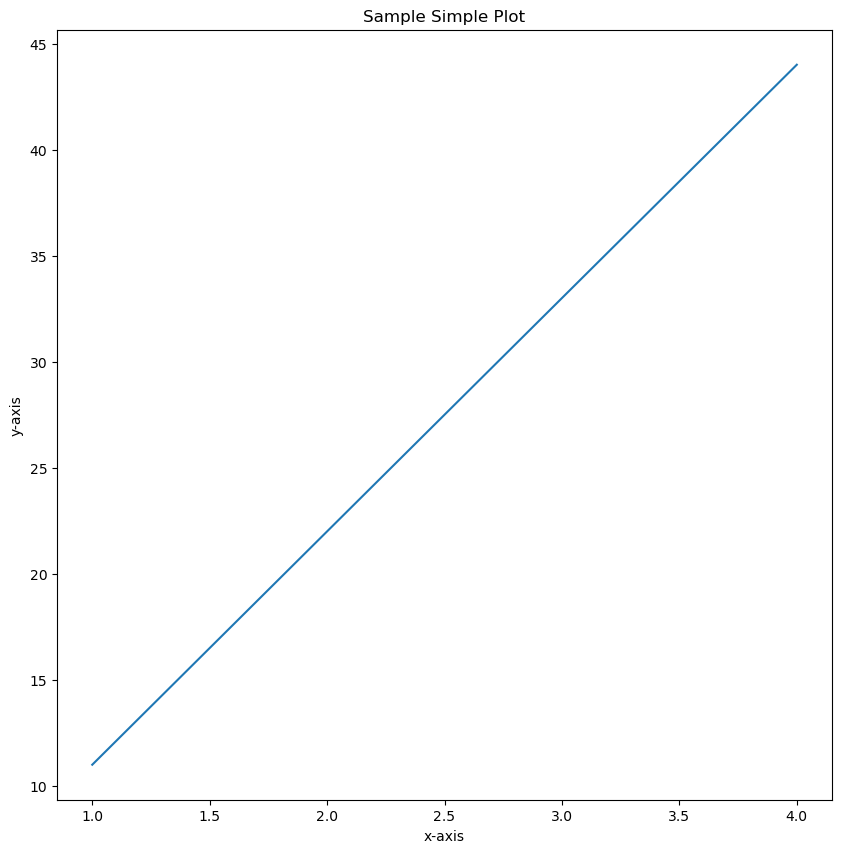

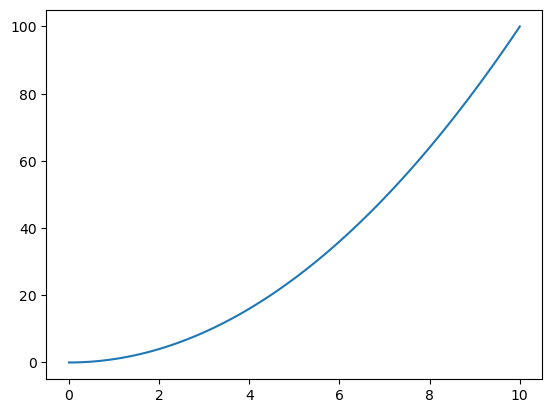

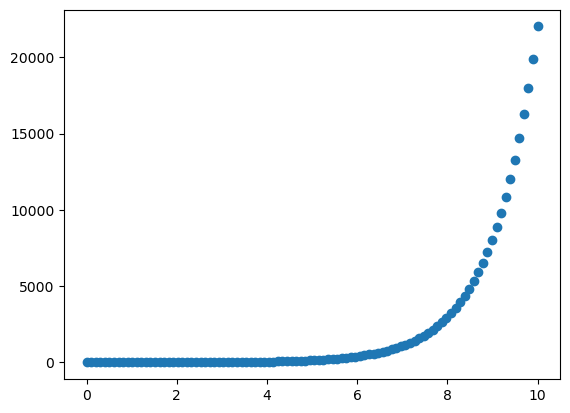

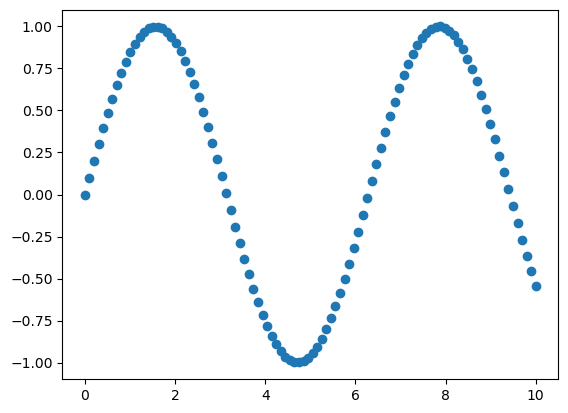

In [103]:
# Create a simple plot, without the semi-colon
plt.plot()
plt.show()

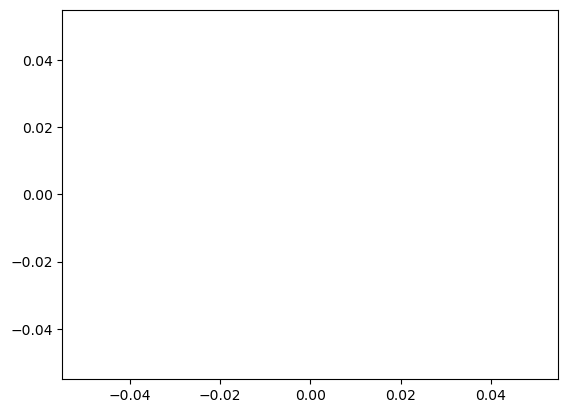

In [104]:
# With the semi-colon removes brackets
plt.plot();
plt.show()

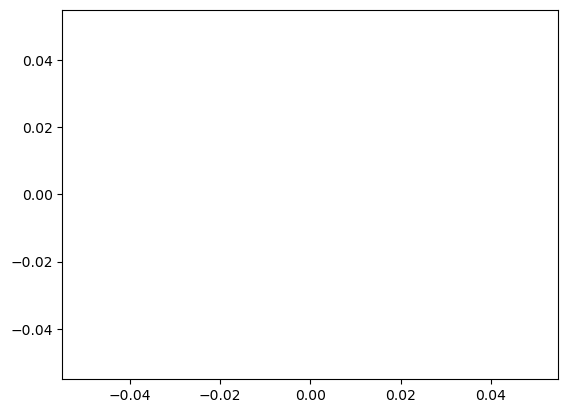

In [105]:
# You could use plt.show() if you want
plt.plot()
plt.show()

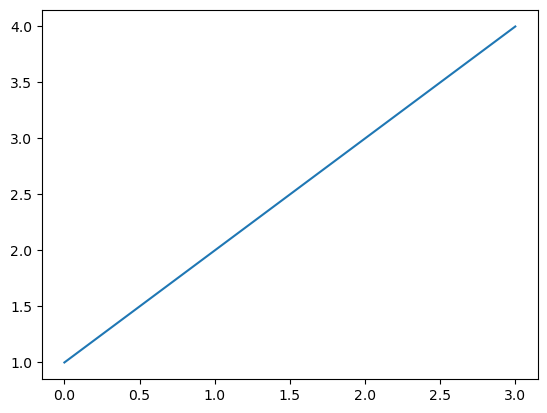

In [106]:
# Let's add some data
plt.plot([1, 2, 3, 4])
plt.show()

In [107]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

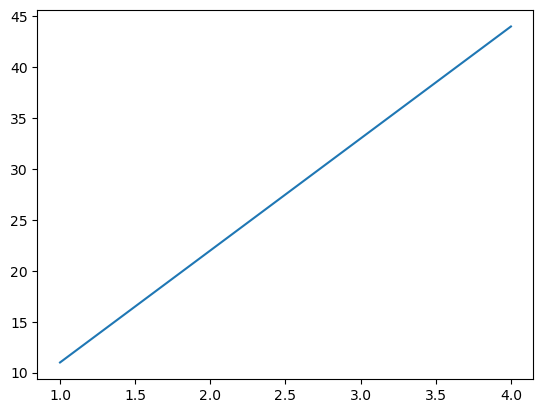

In [108]:
# With a semi-colon and now a y value
plt.plot(x, y);
plt.show()

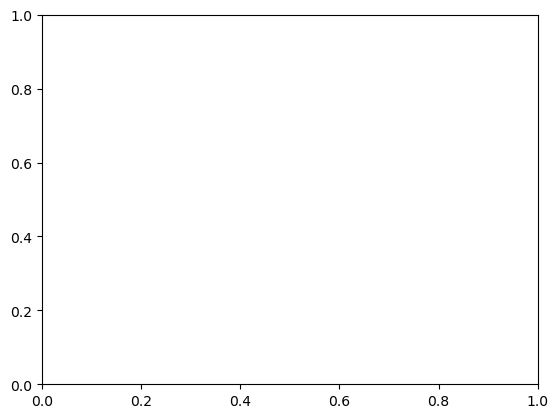

In [109]:
# Creating a plot with the OO verison, confusing way first
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

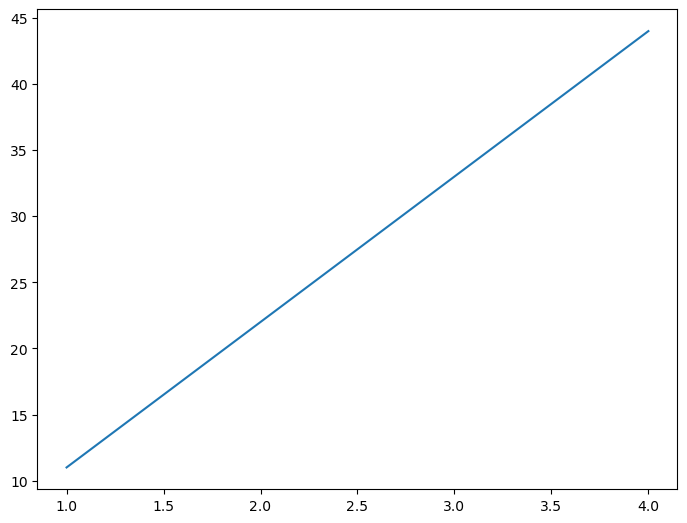

In [110]:
# Confusing #2
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

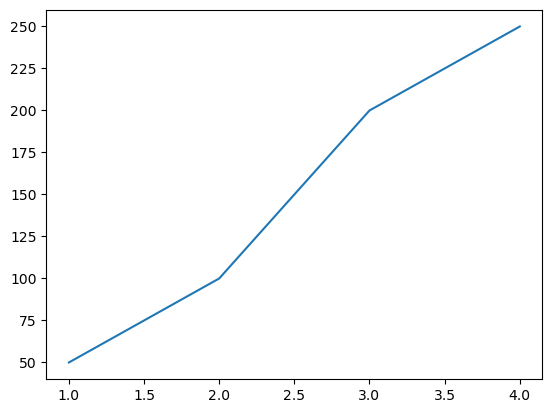

In [111]:
# Easier and more robust going forward (what we're going to use)
fig, ax = plt.subplots()
ax.plot(x, [50,100,200,250]);
plt.show()

## -> Show figure/plot anatomy here <-

In [112]:
# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("../matplotlib/simple-plot.png")

## 2. Making the most common type of plots using NumPy arrays
* line plot
* scatter plot
* bar plot
* histogram
* subplots

In [118]:
import numpy as np

### Line

In [135]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

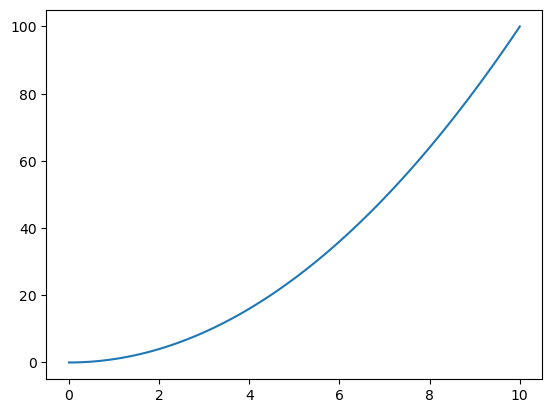

In [136]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);
plt.show()

### Scatter

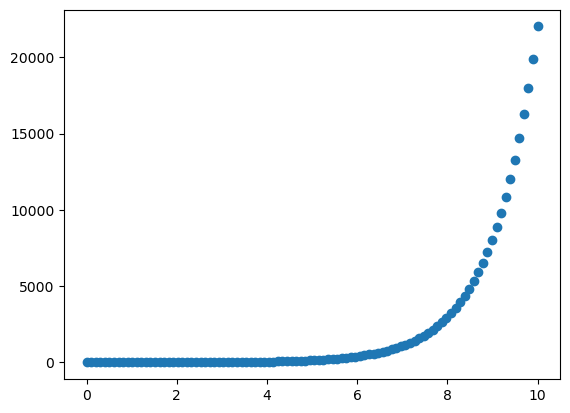

In [137]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));
plt.show()

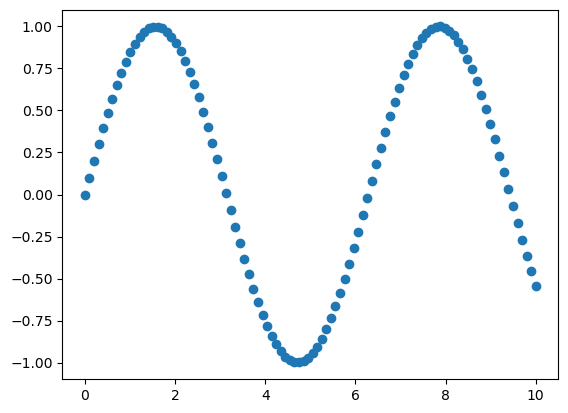

In [138]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));
plt.show()

### Bar

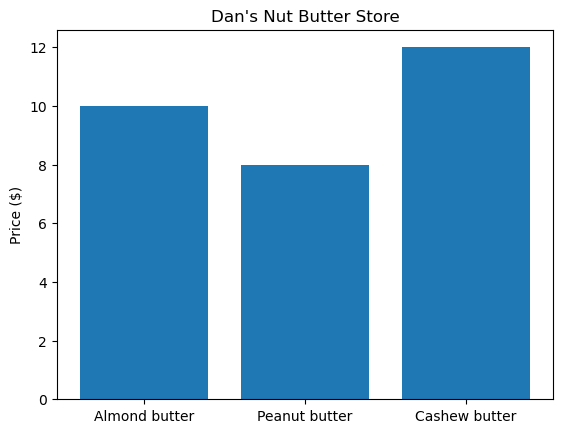

In [139]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");
plt.show()

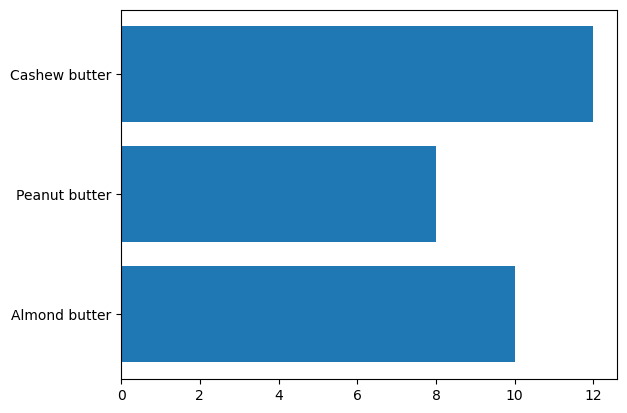

In [140]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));
plt.show()

### Histogram

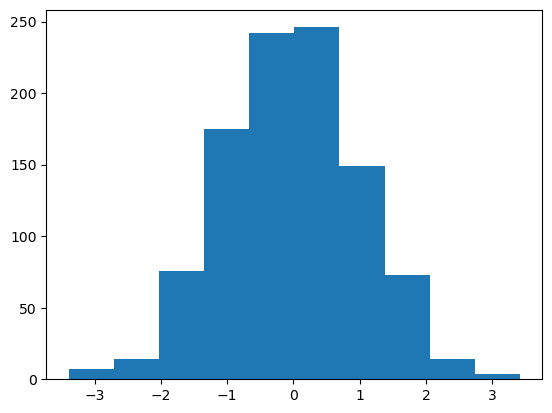

In [141]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);
plt.show()

### Subplots (2 options)

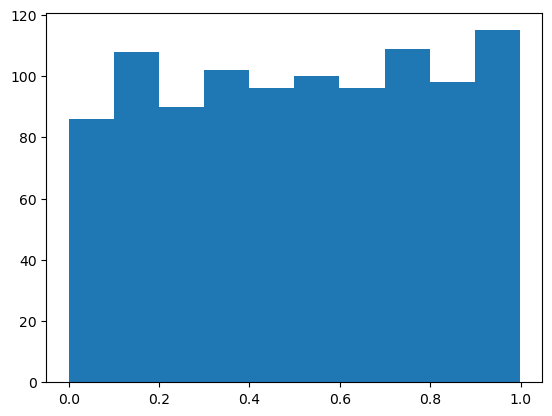

In [152]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);
plt.show()

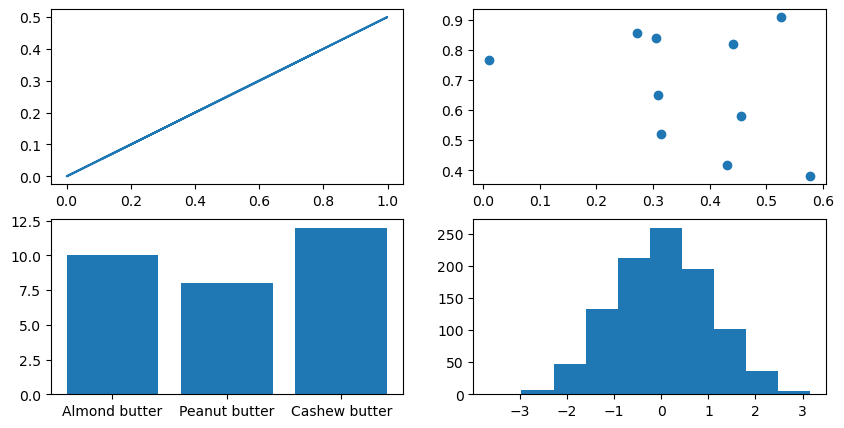

In [153]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))
# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));
plt.show();

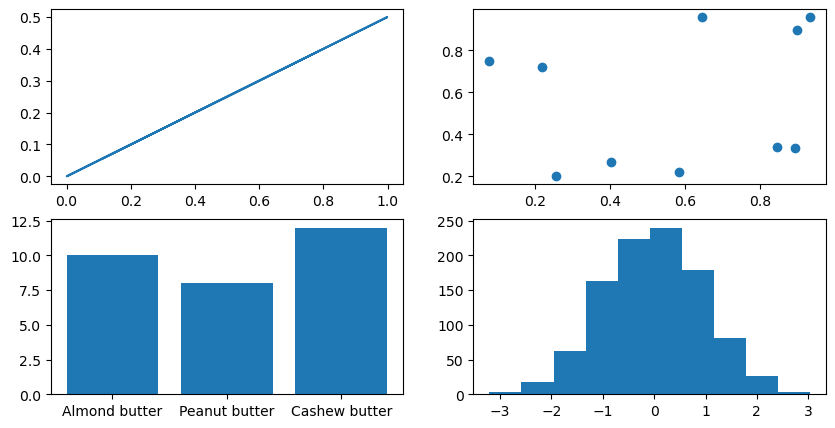

In [154]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));
plt.show()

## 3. Plotting data directly with pandas

In [155]:
import pandas as pd

In [157]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("../matplotlib/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line

In [177]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01    0.239942
2020-01-02   -0.645437
2020-01-03    0.206801
2020-01-04   -1.319023
2020-01-05   -2.474186
                ...   
2022-09-22    0.084733
2022-09-23   -0.562205
2022-09-24    0.867017
2022-09-25    2.260905
2022-09-26   -1.519175
Freq: D, Length: 1000, dtype: float64

In [180]:
# cumsum is cummulative sum
ts.cumsum()

2020-01-01     0.239942
2020-01-02    -0.405495
2020-01-03    -0.198694
2020-01-04    -1.517716
2020-01-05    -3.991902
                ...    
2022-09-22   -40.875421
2022-09-23   -41.437626
2022-09-24   -40.570609
2022-09-25   -38.309704
2022-09-26   -39.828878
Freq: D, Length: 1000, dtype: float64

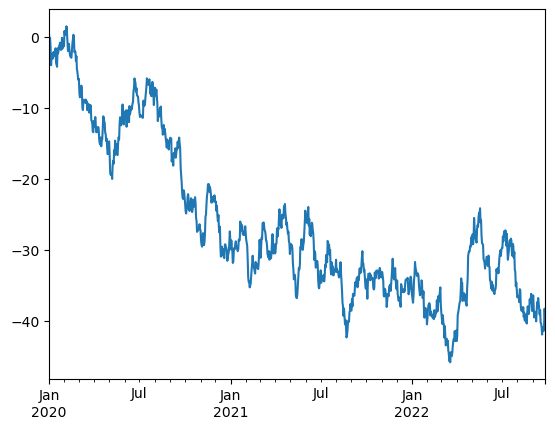

In [192]:
ts.cumsum().plot()
plt.show()

In [206]:
# Converts prices to string datatypes
car_sales["Price"] = car_sales["Price"].astype("string")

In [207]:
# Remove price column symbols from car-sales
car_sales["Price"] = car_sales["Price"].str.replace("$" , "").str.replace("," , "").astype("float").astype("int")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [208]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [209]:
# Want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


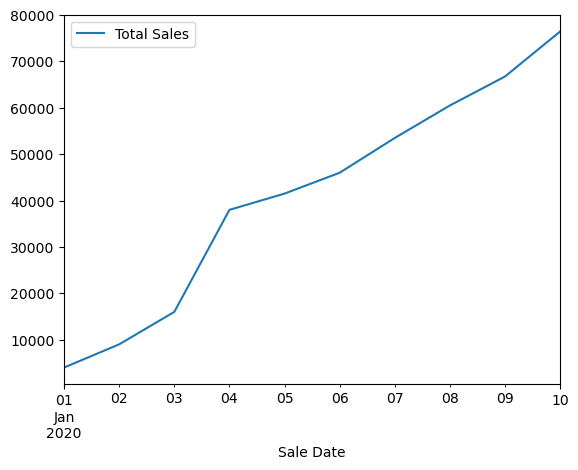

In [216]:
car_sales.plot(x='Sale Date', y='Total Sales')
plt.show()

### Scatter

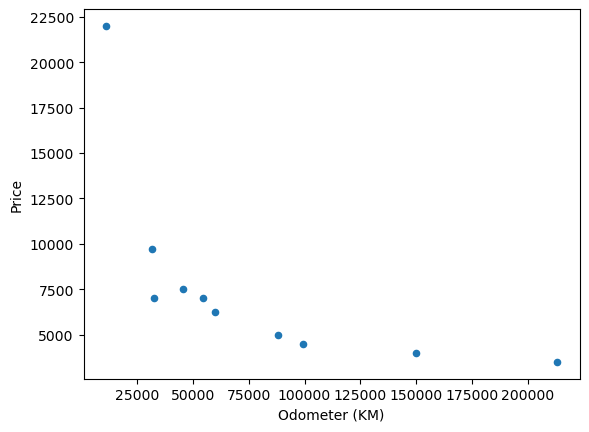

In [219]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show();

### Bar

In [220]:
x = np.random.rand(10, 4)
x

array([[0.27878892, 0.73349193, 0.18157377, 0.30165857],
       [0.22032634, 0.48255543, 0.77484565, 0.49857603],
       [0.61240136, 0.00474321, 0.54300163, 0.53450997],
       [0.38080843, 0.28338944, 0.37610473, 0.85271389],
       [0.31260378, 0.11807037, 0.67878276, 0.90592204],
       [0.66640133, 0.66414249, 0.6531469 , 0.72459094],
       [0.96733312, 0.33538072, 0.1751599 , 0.0907415 ],
       [0.48831615, 0.83135205, 0.47471296, 0.59982607],
       [0.36804595, 0.04967129, 0.42390648, 0.69623242],
       [0.90066925, 0.24817876, 0.53019648, 0.39188026]])

In [221]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.278789,0.733492,0.181574,0.301659
1,0.220326,0.482555,0.774846,0.498576
2,0.612401,0.004743,0.543002,0.534510
3,0.380808,0.283389,0.376105,0.852714
4,0.312604,0.118070,0.678783,0.905922
5,0.666401,0.664142,0.653147,0.724591
6,0.967333,0.335381,0.175160,0.090741
7,0.488316,0.831352,0.474713,0.599826
8,0.368046,0.049671,0.423906,0.696232
9,0.900669,0.248179,0.530196,0.391880


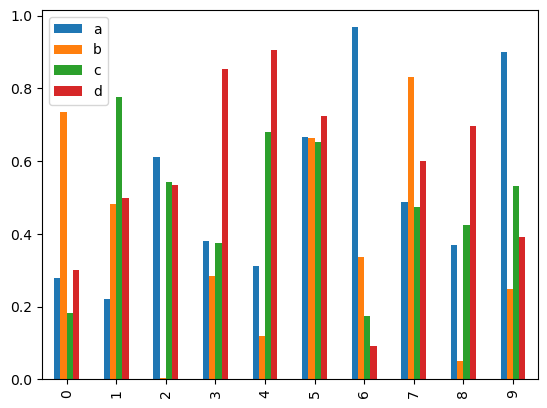

In [224]:
df.plot.bar();
plt.show();

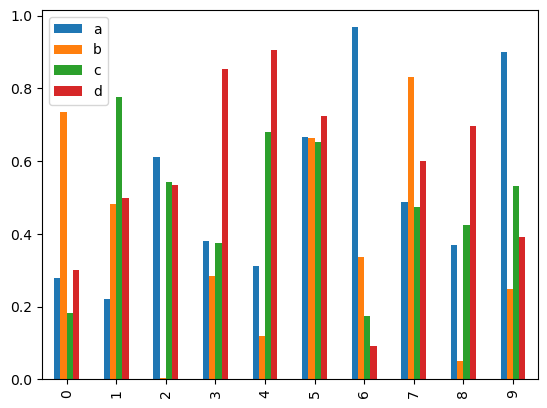

In [225]:
df.plot(kind='bar');
plt.show();

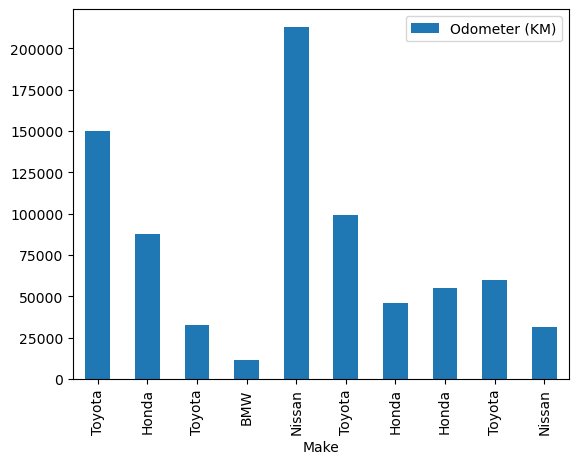

In [226]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');
plt.show();

### Histograms

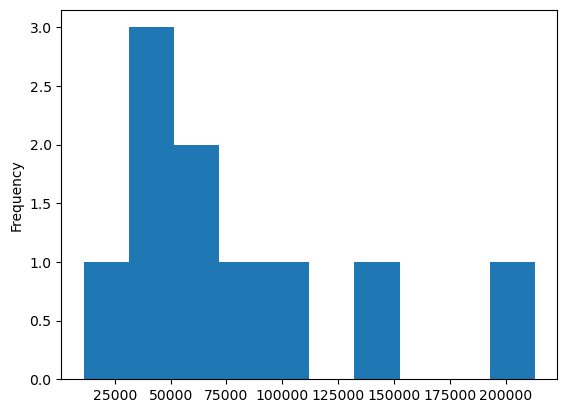

In [233]:
car_sales["Odometer (KM)"].plot.hist();
plt.show();

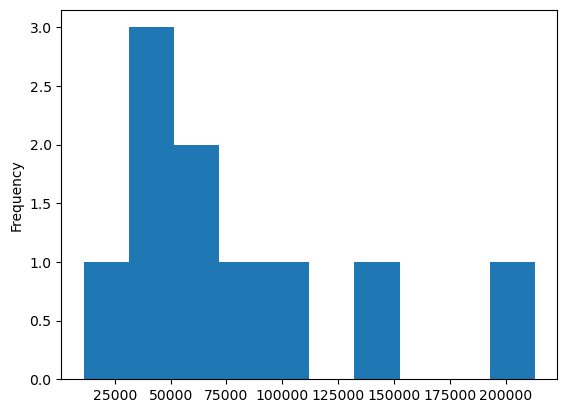

In [234]:
car_sales["Odometer (KM)"].plot(kind="hist")
plt.show();

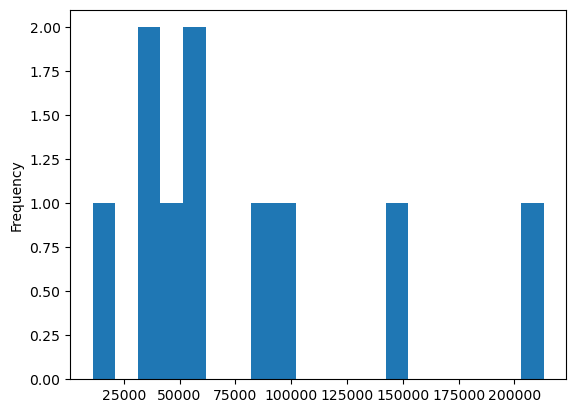

In [235]:
# Bins default is 10
car_sales["Odometer (KM)"].plot.hist(bins=20);
plt.show();

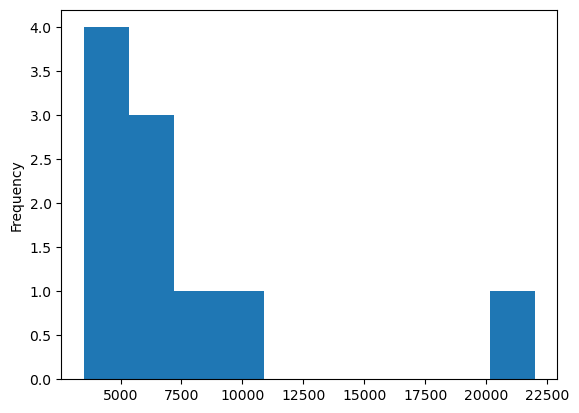

In [236]:
car_sales["Price"].plot.hist();
plt.show();

In [237]:
heart_disease = pd.read_csv("../matplotlib/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


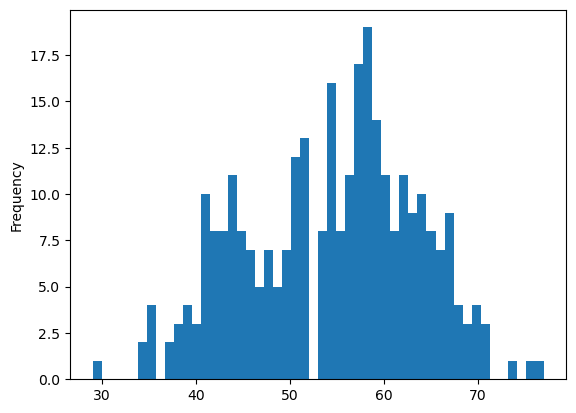

In [238]:
heart_disease["age"].plot.hist(bins=50);
plt.show();

### Subplots

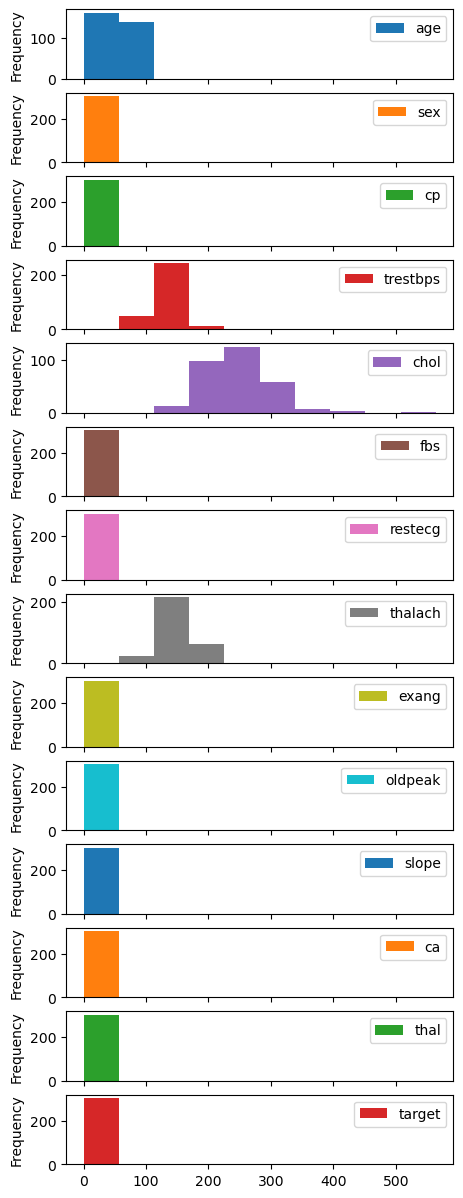

In [243]:
heart_disease.plot.hist(figsize=(5, 15), subplots=True)
plt.show();

## 4. Plotting with pandas using the OO method

In [244]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


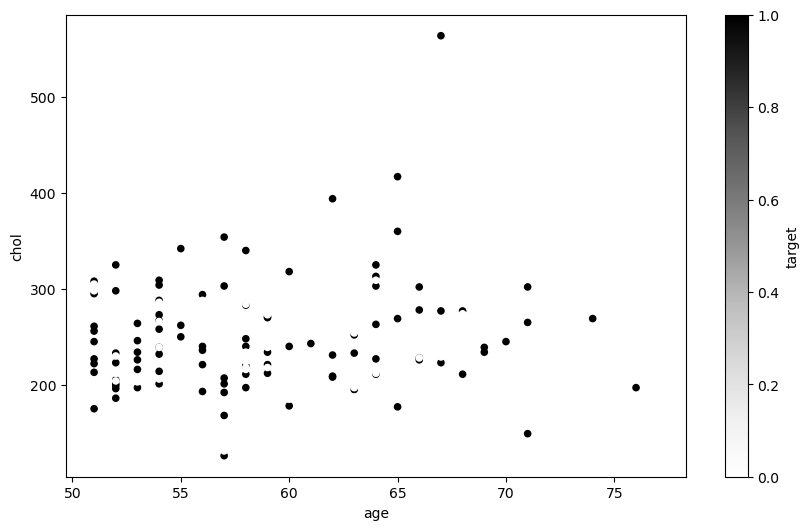

In [247]:
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));
plt.show();

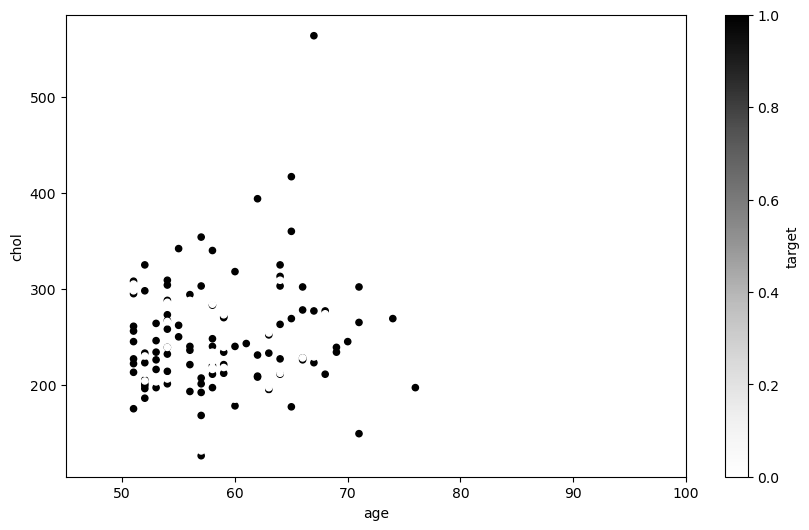

In [252]:
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);
ax.set_xlim([45, 100]); # Adjusts x axis range
plt.show();

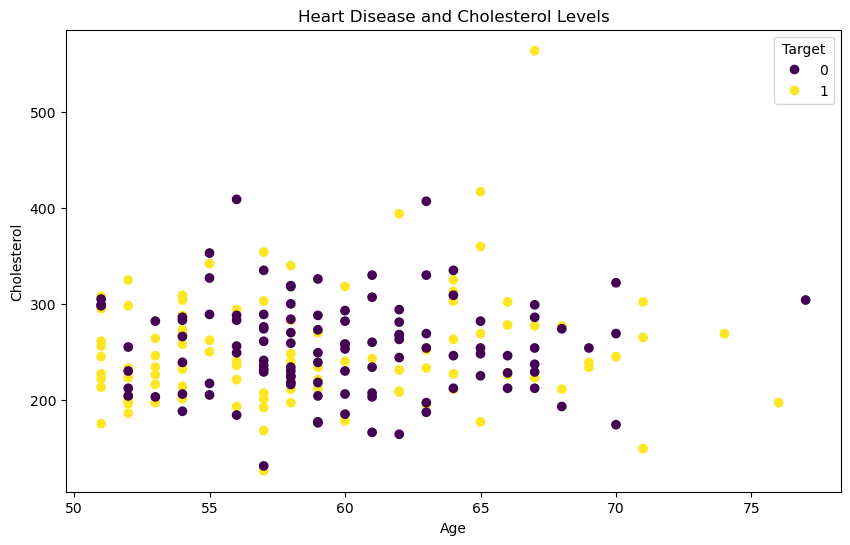

In [258]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");
plt.show();

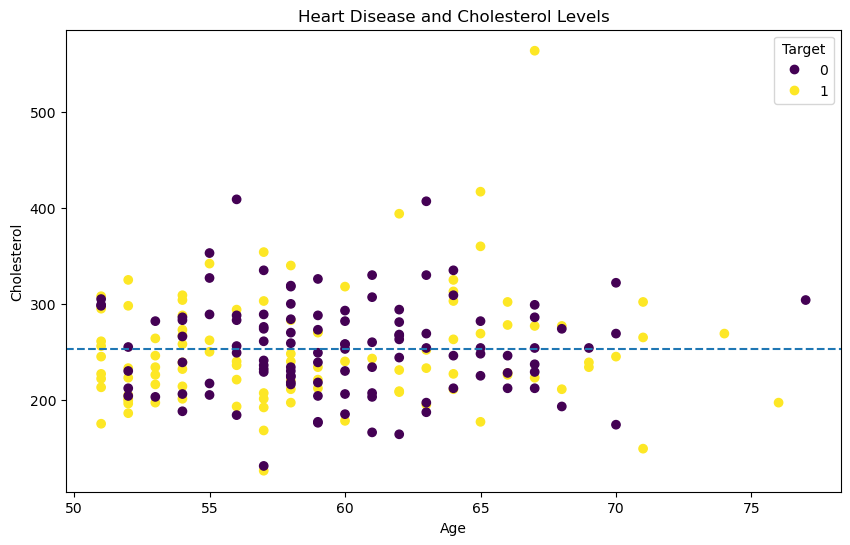

In [267]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line for mean
ax.axhline(over_50["chol"].mean(),
           linestyle="--");
plt.show()

### Adding another plot to an existing styled one

In [269]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


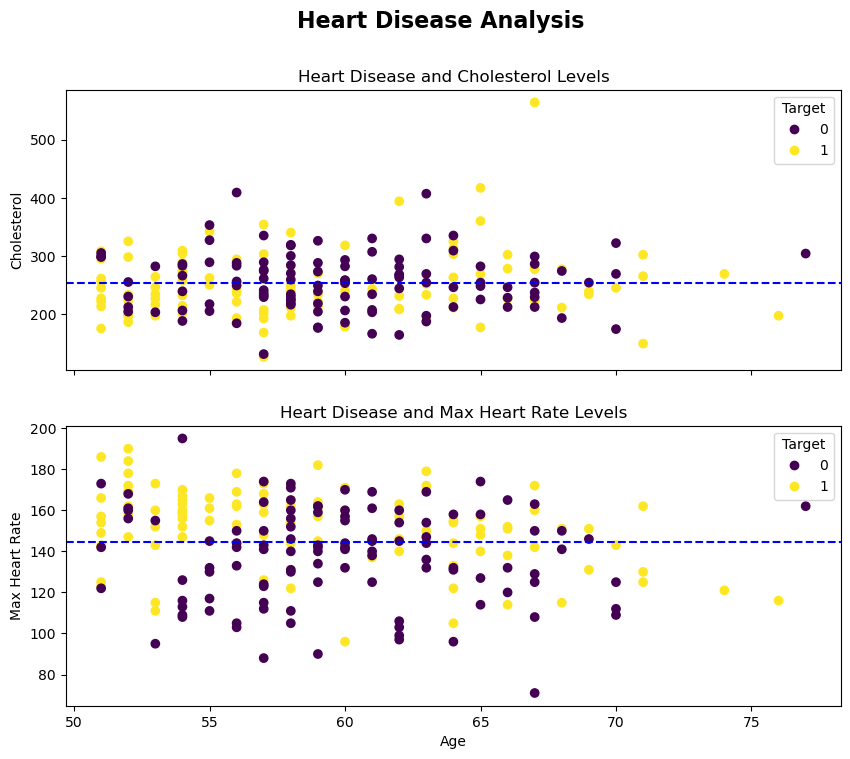

In [272]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');
plt.show()

## 5. Customize your plots

### Styles

In [273]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

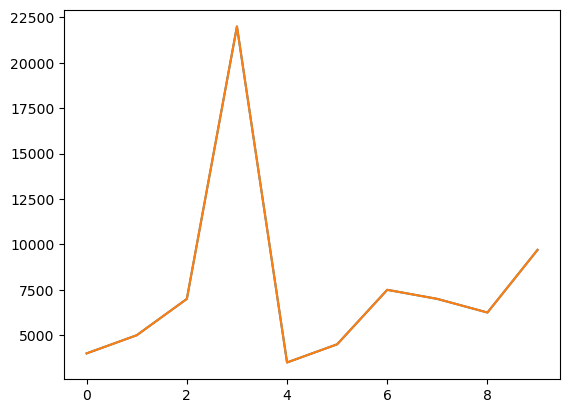

In [275]:
# Plot before changing style
car_sales["Price"].plot();
plt.show();

In [282]:
# Change the style... 
plt.style.use('seaborn-v0_8-pastel')

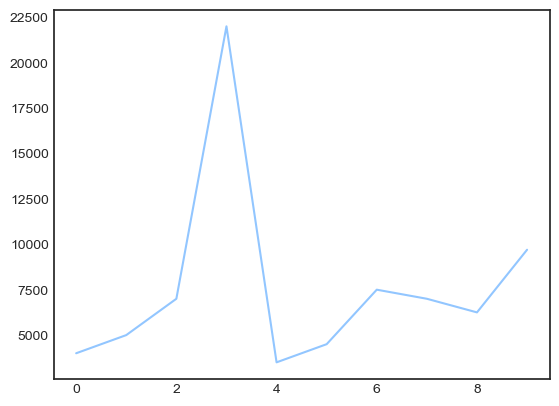

In [283]:
car_sales["Price"].plot();
plt.show();

In [285]:
plt.style.use('seaborn-v0_8')

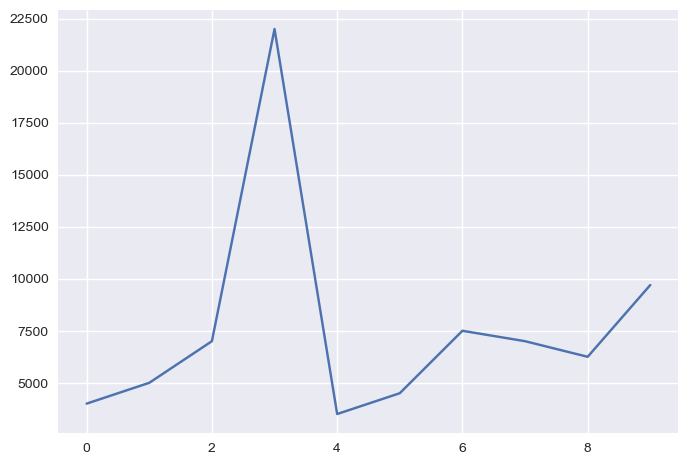

In [288]:
car_sales["Price"].plot();
plt.show();

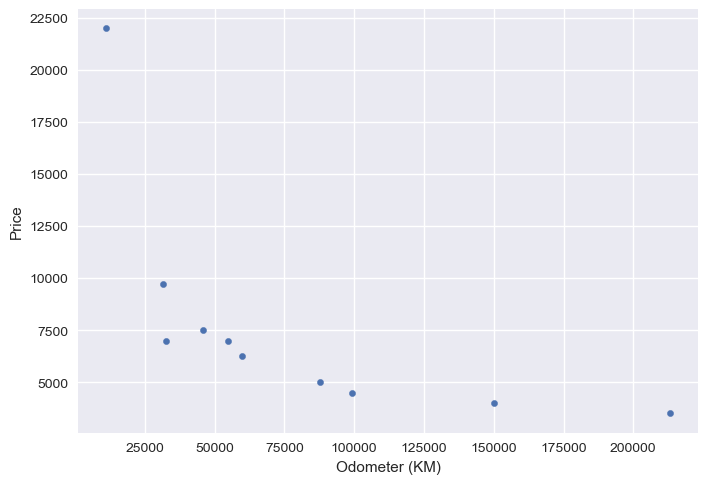

In [289]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");
plt.show();

In [290]:
plt.style.use('ggplot')

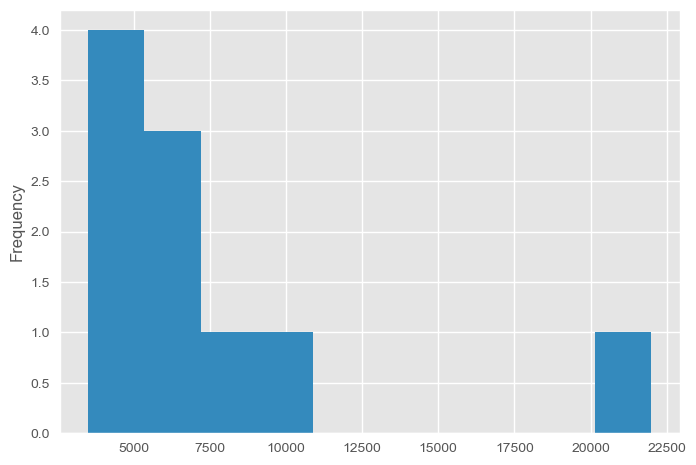

In [292]:
car_sales["Price"].plot.hist();
plt.show();

### Changing the title, legend and axis

In [293]:
x = np.random.randn(10, 4)
x

array([[ 1.47738291,  0.68880339,  0.3680235 , -0.89548452],
       [-1.18074104, -1.91790369,  0.14950565,  0.51421781],
       [ 0.50422253, -0.42974634, -0.80522365,  0.15948187],
       [ 0.12774075, -0.18820946, -0.4068368 ,  0.72841557],
       [ 0.82880019,  0.50829891, -0.0694247 , -0.14963188],
       [-0.85631829, -1.57223049,  0.67090097,  0.11088237],
       [ 2.1939744 ,  0.21703437,  0.05042816,  0.25508228],
       [-0.04641475, -0.15989454,  0.14985989,  0.32925747],
       [-1.41958107,  0.77515335,  0.82363965, -1.22600427],
       [ 0.04451225,  0.4504096 ,  0.69952823,  0.50873321]])

In [294]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.477383,0.688803,0.368023,-0.895485
1,-1.180741,-1.917904,0.149506,0.514218
2,0.504223,-0.429746,-0.805224,0.159482
3,0.127741,-0.188209,-0.406837,0.728416
4,0.828800,0.508299,-0.069425,-0.149632
5,-0.856318,-1.572230,0.670901,0.110882
6,2.193974,0.217034,0.050428,0.255082
7,-0.046415,-0.159895,0.149860,0.329257
8,-1.419581,0.775153,0.823640,-1.226004
9,0.044512,0.450410,0.699528,0.508733


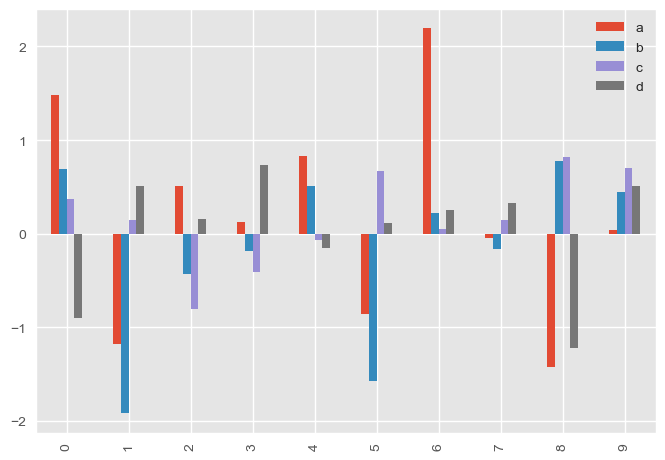

In [295]:
ax = df.plot(kind='bar')
type(ax)
plt.show();

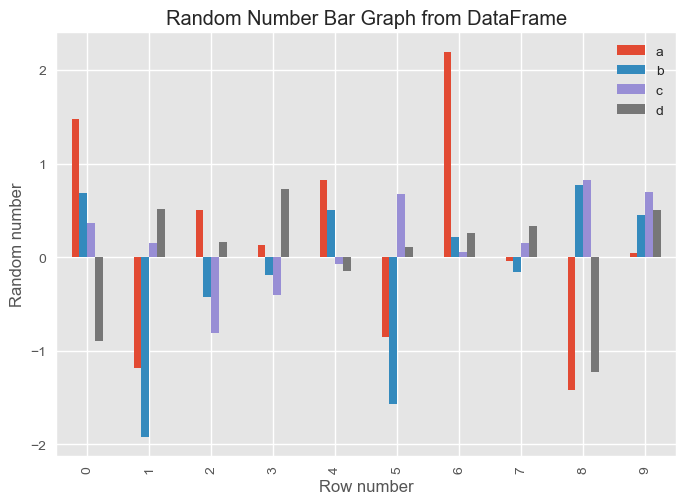

In [296]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)
plt.show();

### Changing the cmap

In [302]:
plt.style.use('seaborn-v0_8-whitegrid')

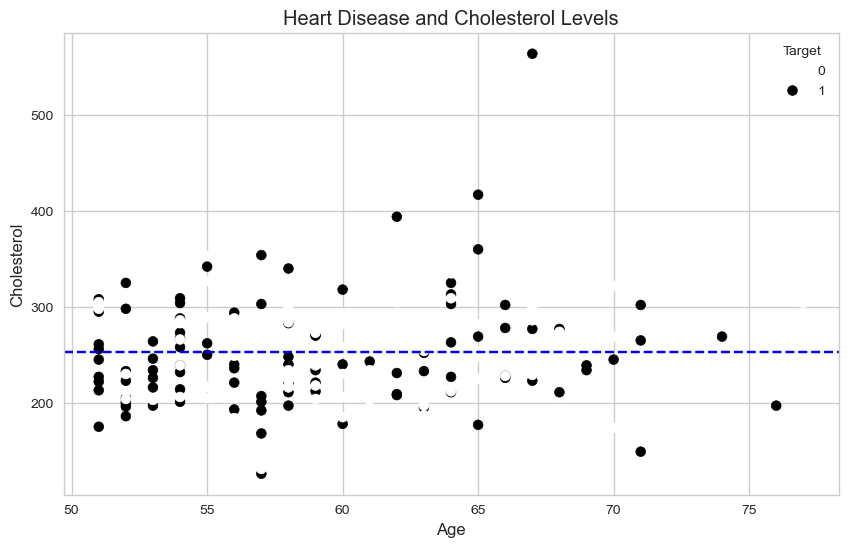

In [303]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");
plt.show();

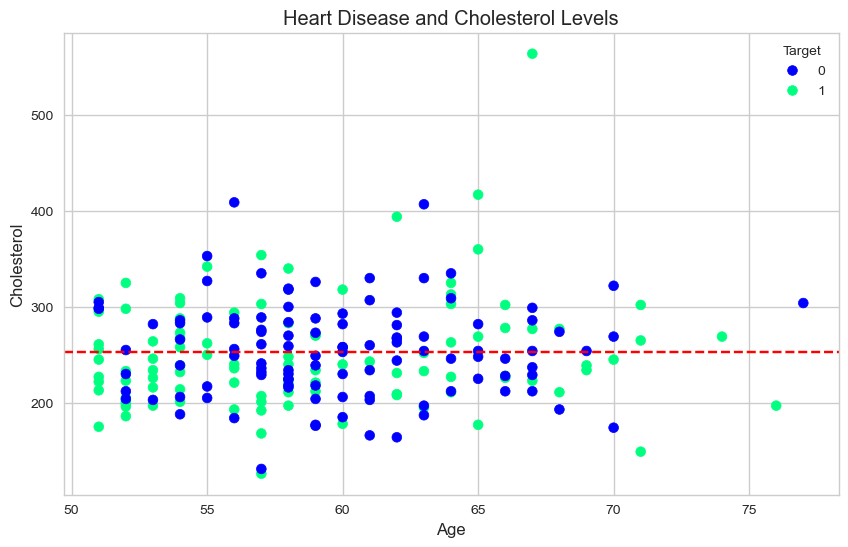

In [314]:
# Change cmap and horizontal line to be a different colour
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter") # winter, summer, spring, plasma, inferno, magma, cividis, viridis, ect.
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");
plt.show()

### Changing the xlim and ylim

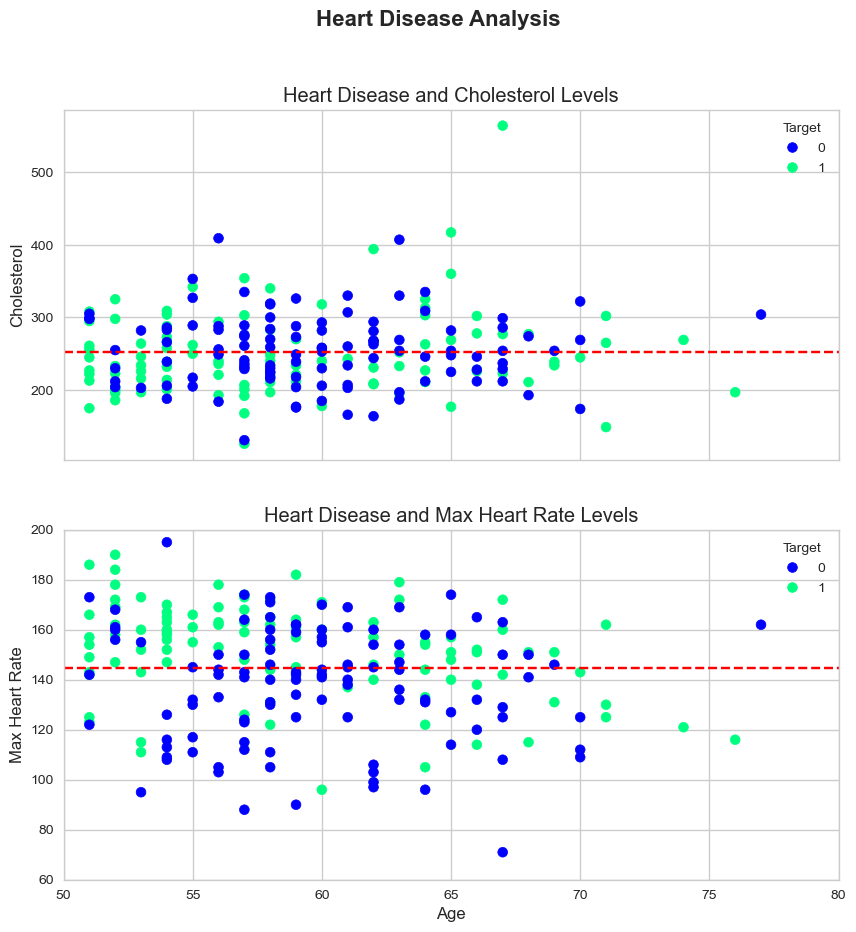

In [318]:
# Changing the xlim and ylim
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');
plt.show();

## 6. Saving plots using figsave()

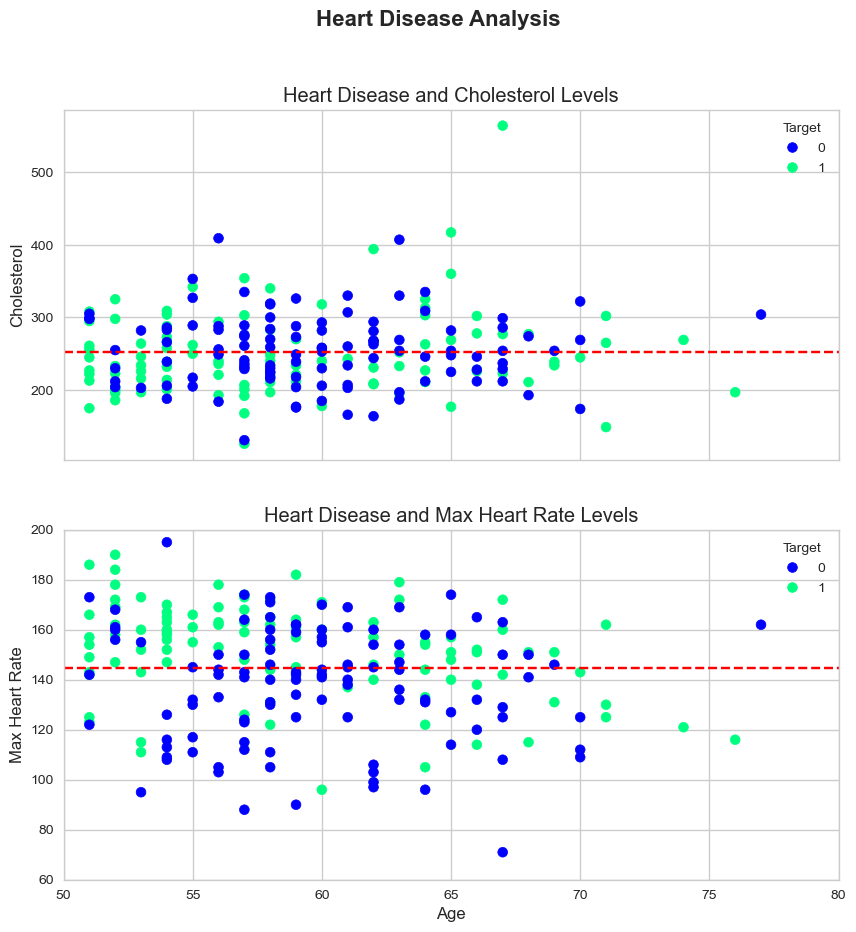

In [321]:
fig

In [322]:
fig.savefig("../matplotlib/heart-disease-analysis.png")

In [323]:
# Resets figure
fig, ax = plt.subplots()